In [1]:
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns=['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# we will drop the SPecies as it is unsupervised we will not use the label for trainng. But use that for testing 

X= df.drop(columns=['Species'], axis=1)
y = df['Species']


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#SS cz the data is in normal distribution -> convert them in btw 0 1
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [7]:
from sklearn.mixture import GaussianMixture

aic = []
bic = []
for k in range(1, 11): #1 to 10 trying all the cluster which one is better
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)#train the model on each clusters
    aic.append(gmm.aic(X_scaled))#aic and bic are inbulit methods 
    bic.append(gmm.bic(X_scaled))
    


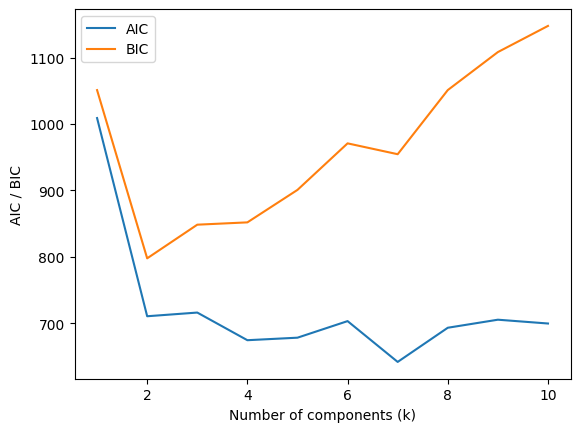

In [8]:
import matplotlib.pyplot as plt 
plt.plot(range(1, 11), aic, label='AIC')
plt.plot(range(1, 11), bic, label='BIC')
plt.xlabel('Number of components (k)')
plt.ylabel('AIC / BIC')
plt.legend()
plt.show()


In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type="tied", n_init=10, random_state=42)#random_state=42 control the randomness so the model will give same output
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

In [10]:
from sklearn.metrics import adjusted_rand_score

print("ARI Score:", adjusted_rand_score(y, labels))


ARI Score: 0.5681159420289855


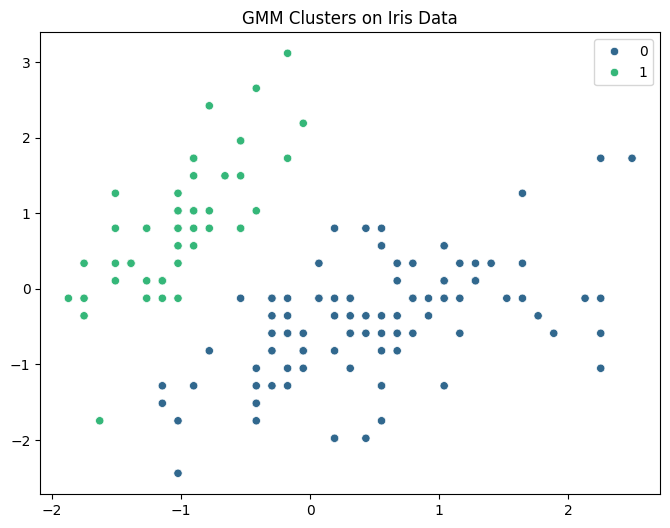

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette="viridis")
plt.title("GMM Clusters on Iris Data")
plt.show()
